<H2>Influence of AI objects on quality of OSM data</H2>
<H5>1. analysis of quality to the date before AI started (the end of 2019)</H5>
<H5>2. analysis of quality to the present without AI buildings/roads</H5>
<H5>3. analysis of quality to the present including AI buildings/roads</H5>
<H5>Is there improvement in quality since 2020?</H5>
<H5>Is improvement different (better?) with AI buildings/roads than without it?</H5>
<br></br>
<p>Buildings:</p>
<p>MappingSaturation, building_count</p>
<p>BuildingCompleteness, building_area</p>
<p>GhsPopComparisonBuildings, building_count</p>
<p>BuildingReport"</p>
<br></br>
<p>Roads:</p>
<p>MappingSaturation, major_roads_length</p>
<p>GhsPopComparisonRoads, major_roads_length</p>
<p>RoadReport</p>
<br></br>
<p>"Currentness" or "TagsRatio" were not selected.</p>
<br></br>
<H5>This Jupyter is about MappingSaturation of buildings.</H5>
<br></br>





<H3>Analysis of quality to the date before AI started (the end of 2019)</H3>
<p>1. ohsome - "filter": "building=*". </p>
<p>"time": "/2020-01-01/P1M"</p>
<p>Selected AI buildings. Remainder is what I need.</p> 
<p>2. OQT - using result from ohsome.</p>
<p> "MappingSaturation"</p>

In [11]:
import json
import requests
from datetime import datetime

base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count"
url = base_url + endpoint

with open("italy-florence.geojson", "r") as file:
#with open("italy-florence-quartier-5.geojson", "r") as file:
#with open("3_Kenya.geojson", "r") as file:    
    bpolys_ohs = json.load(file)
#bpolys_ohs ="34.40503165,-4.2800038,34.4226,-4.2800038,34.4226,-4.2698,34.40503165,-4.2698,34.40503165,-4.2800038"

parameters = {
    "bpolys": json.dumps(bpolys_ohs),  # pass GeoJSON as string.
    #OR
    #"bpolys": bpolys_ohs,
    "filter": "building=*",
    "format": "json",
    "time": "/2020-01-01/P1M",
}

headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

#print("Response:")
#print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["result"]
print(result)

[{'timestamp': '2007-10-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2007-11-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2007-12-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-01-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-02-08T00:00:00Z', 'value': 1.0}, {'timestamp': '2008-03-08T00:00:00Z', 'value': 1.0}, {'timestamp': '2008-04-08T00:00:00Z', 'value': 4.0}, {'timestamp': '2008-05-08T00:00:00Z', 'value': 5.0}, {'timestamp': '2008-06-08T00:00:00Z', 'value': 8.0}, {'timestamp': '2008-07-08T00:00:00Z', 'value': 26.0}, {'timestamp': '2008-08-08T00:00:00Z', 'value': 26.0}, {'timestamp': '2008-09-08T00:00:00Z', 'value': 26.0}, {'timestamp': '2008-10-08T00:00:00Z', 'value': 27.0}, {'timestamp': '2008-11-08T00:00:00Z', 'value': 30.0}, {'timestamp': '2008-12-08T00:00:00Z', 'value': 32.0}, {'timestamp': '2009-01-08T00:00:00Z', 'value': 33.0}, {'timestamp': '2009-02-08T00:00:00Z', 'value': 37.0}, {'timestamp': '2009-03-08T00:00:00Z', 'value': 40.0}, {'timestamp': '2009-04-08T00:00:00Z'

Analysis of quality to the date before AI started (the end of 2019).
{
    "description": "The saturation of the last 3 years is 43.53%.\nSaturation is in progress (30% < Saturation \u2264 97%).\n",
    "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
    "timestamp_osm": "2019-12-08T00:00:00+00:00",
    "value": 0.43532521859186696,
    "label": "yellow",
    "class": 3
}


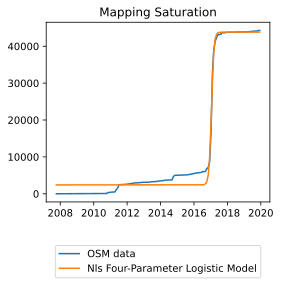

In [12]:
#import json
#import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

#with open("italy-florence.geojson", "r") as file:
#with open("italy-florence-quartier-5.geojson", "r") as file:
#with open("3_Kenya.geojson", "r") as file:    
#    bpolys_oqt = json.load(file)
#OR
xbpolys_oqt = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}

layer = {
    "name": "",
    "description": "",
    "data": {
          "result":result
          }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys_ohs,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False,
  "includeData": False
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
#print(properties)

print("Analysis of quality to the date before AI started (the end of 2019).")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H3>Analysis of quality to the present without AI objects.</H3>
<p>1. ohsome - filter "microsoft/BuildingFootprints". </p>
<p> "groupByKey": "source"</p>
<p> "groupByValues": "microsoft/BuildingFootprints"</p>
<p>Selected AI buildings. Remainder is what I need.</p> 
<p>2. OQT - using result from ohsome.</p>
<p> "MappingSaturation"</p>

In [13]:
import json
import requests
from datetime import datetime

base_url = "https://api.ohsome.org/v1"
#endpoint = "/elements/count"
#endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
endpoint = "/elements/count/groupBy/tag"
url = base_url + endpoint

with open("italy-florence.geojson", "r") as file:
#with open("italy-florence-quartier-5.geojson", "r") as file:
#with open("3_Kenya.geojson", "r") as file:    
    bpolys_ohs = json.load(file)
#bpolys_ohs ="34.40503165,-4.2800038,34.4226,-4.2800038,34.4226,-4.2698,34.40503165,-4.2698,34.40503165,-4.2800038"

parameters = {
    "bpolys": json.dumps(bpolys_ohs),  # pass GeoJSON as string.
    # OR:
    #"bpolys": bpolys_ohs,
    "filter": "building=*", 
    "groupByKey": "source",
    "groupByValues": "microsoft/BuildingFootprints",
    "format": "json",
    "time": "/2023-04-01/P1M",
}

headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

#print("Response:")
print(json.dumps(response.json(), indent=4))  # Pretty print response

preresult = response.json()["groupByResult"]

result=""
for value in preresult:     #finds remainder and writes his "result" as result for next cell 
    pom=value["groupByObject"]
    if (pom=="remainder"):
        result=value["result"]

#print(result)        


{
    "attribution": {
        "url": "https://ohsome.org/copyrights",
        "text": "\u00a9 OpenStreetMap contributors"
    },
    "apiVersion": "1.9.0",
    "groupByResult": [
        {
            "groupByObject": "remainder",
            "result": [
                {
                    "timestamp": "2007-10-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2007-11-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2007-12-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-01-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-02-08T00:00:00Z",
                    "value": 1.0
                },
                {
                    "timestamp": "2008-03-08T00:00:00Z",
                    "value": 1.0
 

Analysis of quality to the present without AI buildings
{
    "description": "The saturation of the last 3 years is 100.0%.\nHigh saturation has been reached (97% < Saturation \u2264 100%).\n",
    "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
    "timestamp_osm": "2023-03-08T00:00:00+00:00",
    "value": 1.0,
    "label": "green",
    "class": 5
}


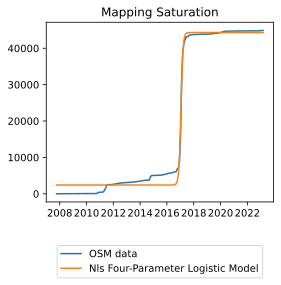

In [14]:
#import json
#import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

#with open("italy-florence.geojson", "r") as file:
#with open("italy-florence-quartier-5.geojson", "r") as file:
#with open("3_Kenya.geojson", "r") as file:    
#    bpolys_oqt = json.load(file)
#OR
xbpolys_oqt = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}

layer = {
    "name": "",
    "description": "",
    "data": {
    "result": result
    }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys_ohs,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False,
  "includeData": True
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
#print(properties)

print("Analysis of quality to the present without AI buildings")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H3>Analysis of quality to the present including AI objects.</H3>
<p>OQT</p>


Analysis of quality to the present including AI buildings
{
    "metadata": {
        "name": "Mapping Saturation",
        "description": "Calculate if mapping has saturated.\nHigh saturation has been reached if the growth of the fitted curve is minimal.\n"
    },
    "layer": {
        "key": "building_count",
        "name": "Building Count",
        "description": "All buildings as defined by all objects tagged with 'building=*'.\n"
    },
    "result": {
        "description": "The saturation of the last 3 years is 100.0%.\nHigh saturation has been reached (97% < Saturation \u2264 100%).\n",
        "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
        "timestamp_osm": "2023-04-01T00:00:00+00:00",
        "value": 1.0,
        "label": "green",
        "class": 5
    },
    "osm_id": -42602,
    "boundary": "administrative",
    "admin_level": 8,
    "parents": "-42472,-41977,-365331",
    "name": "Florence",
    "local_name": "Firenze",
    "name_en": "Florence",
    "data

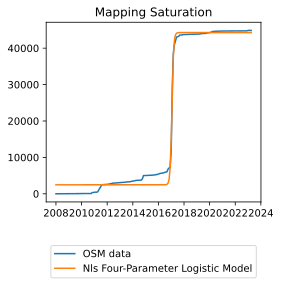

In [16]:
import json
import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

with open("italy-florence.geojson", "r") as file:
#with open("italy-florence-quartier-5.geojson", "r") as file:
#with open("3_Kenya.geojson", "r") as file:    
    bpolys_oqt = json.load(file)
#OR
xbpolys_oqt = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}

parameters = {
  "name": "MappingSaturation",
  #"bpolys": json.dumps(bpolys_oqt),  # pass GeoJSON as string.
  "bpolys": bpolys_oqt,
  "layerKey": "building_count",
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False,
  "includeData": True
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
#print(properties)
print("Analysis of quality to the present including AI buildings")
print(json.dumps(properties, indent=4))  # Pretty print response

display(SVG(svg))